## USAIN BOLT ⚡️ FVP
> London 2012

In [1]:
import numpy
import pandas as pd
from datetime import datetime
import helpers

#### Import Data

In [2]:
# Import Data (e.g. From File)
df = pd.read_csv('./data/Speed Export for Usain Bolt 120805.csv')

# Clean Data
df = helpers.clean_gps_data(df)

# Identify Peak (if data is not scoped, this function finds peak velocity in series and scopes around a 7.5 second dataframe). Scope already defined for Bolt's data.
# df = helpers.indentify_fvp_scope(df)

df

,Velocity (m/s),Time (s)
0,0.50,0.1
1,1.03,0.2
2,1.63,0.3
3,2.23,0.4
4,2.83,0.5
...,...,...
69,12.30,7.0
70,12.32,7.1
71,12.34,7.2
72,12.35,7.3


#### Global Variables

In [3]:
height = 1.95

bodyweight = 94

max_velocity = df["Velocity (m/s)"].max()

tau = 1.55

#### Model Speed and Acceleration

In [4]:
df["Model Speed (m/s)"] = helpers.model_speed(
    df["Time (s)"], 
    df["Velocity (m/s)"], 
    max_velocity, 
    tau
)

df["Acceleration (m/s2)"] = helpers.model_acceleration(
    df["Time (s)"], 
    df["Velocity (m/s)"], 
    max_velocity, 
    tau
)

#### Plot Speed and Acceleration

Text(0, 0.5, 'Speed (m/s) and Acceleration (m/s2)')

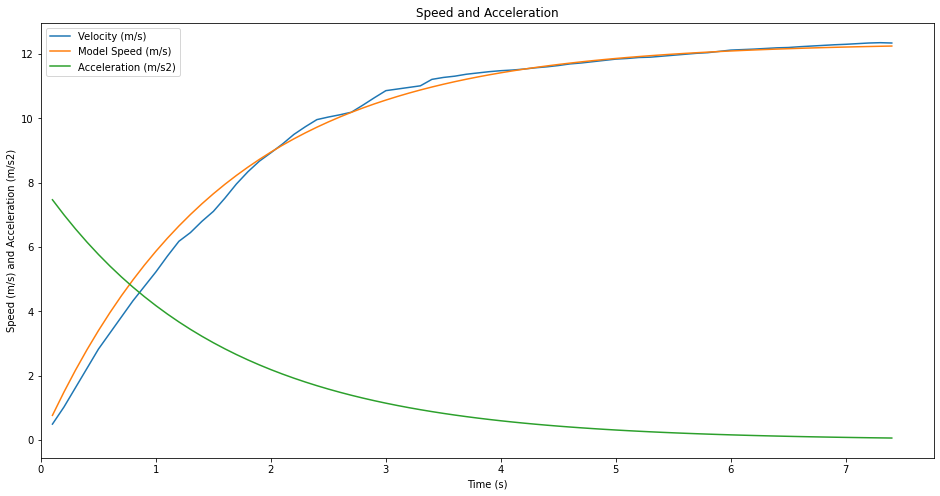

In [5]:
speed_acc_df = df[["Time (s)", "Velocity (m/s)", "Model Speed (m/s)", "Acceleration (m/s2)"]]
plot = speed_acc_df.plot.line(x="Time (s)", figsize=(16,8), title="Speed and Acceleration")
plot.set_xlim(0)
plot.set_ylabel("Speed (m/s) and Acceleration (m/s2)")

#### Model Force and Power

In [6]:
df["Force (N)"] = helpers.model_force(
    bodyweight, 
    height, 
    df["Acceleration (m/s2)"], 
    df["Model Speed (m/s)"]
)

df["Force (N/kg)"] = df["Force (N)"] / bodyweight

df["Power (W/kg)"] = df["Force (N/kg)"] * df["Model Speed (m/s)"]

#### Plot Force and Power

Text(0, 0.5, 'Power (W/kg)')

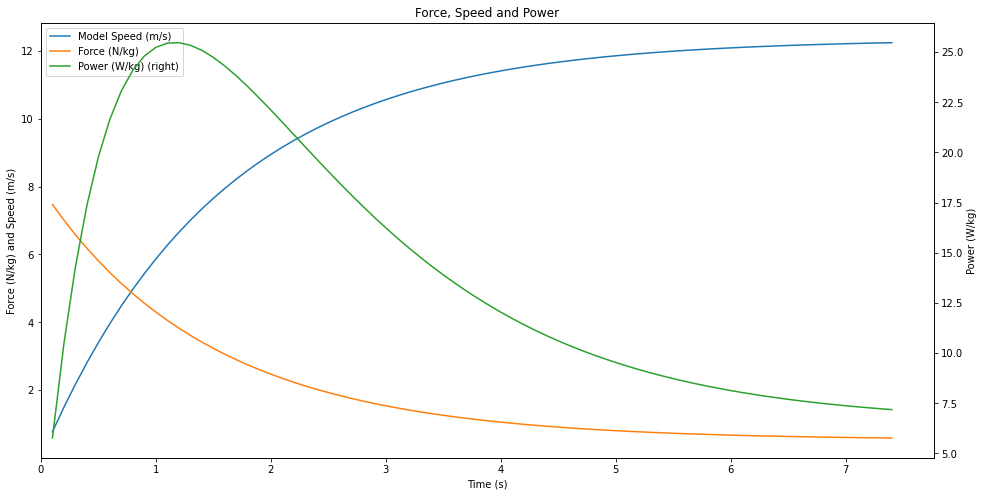

In [7]:
force_power_df = df[["Time (s)", "Model Speed (m/s)", "Force (N/kg)", "Power (W/kg)"]]
plot = force_power_df.plot.line(x="Time (s)", secondary_y="Power (W/kg)", figsize=(16,8), title="Force, Speed and Power")
plot.set_ylabel("Force (N/kg) and Speed (m/s)")
plot.set_xlim(0)
plot.right_ax.set_ylabel("Power (W/kg)")

#### Plot Force-Velocity and Power-Velocity

Text(0, 0.5, 'Power (W/kg)')

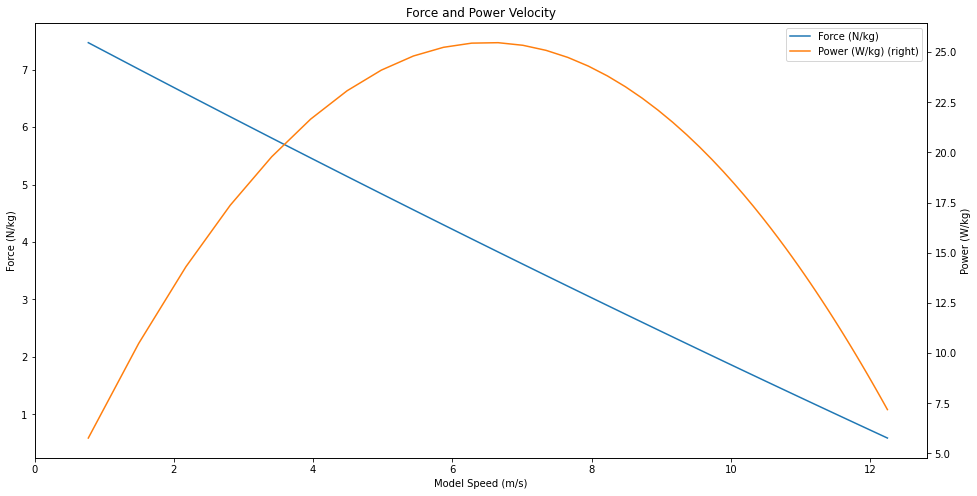

In [8]:
force_power_velocity_df = df[["Model Speed (m/s)", "Force (N/kg)", "Power (W/kg)"]]
plot = force_power_velocity_df.plot.line(x="Model Speed (m/s)", secondary_y="Power (W/kg)", figsize=(16,8), title="Force and Power Velocity")
plot.set_ylabel("Force (N/kg)")
plot.set_xlim(0)
plot.right_ax.set_ylabel("Power (W/kg)")

#### Model Ratio of Force

In [9]:
df["Ratio Force (%)"] = helpers.model_ratio_force(
    df["Force (N)"],
    max_velocity,
    bodyweight
)

#### Plot Ratio of Force

Text(0, 0.5, 'Ratio of Force (%)')

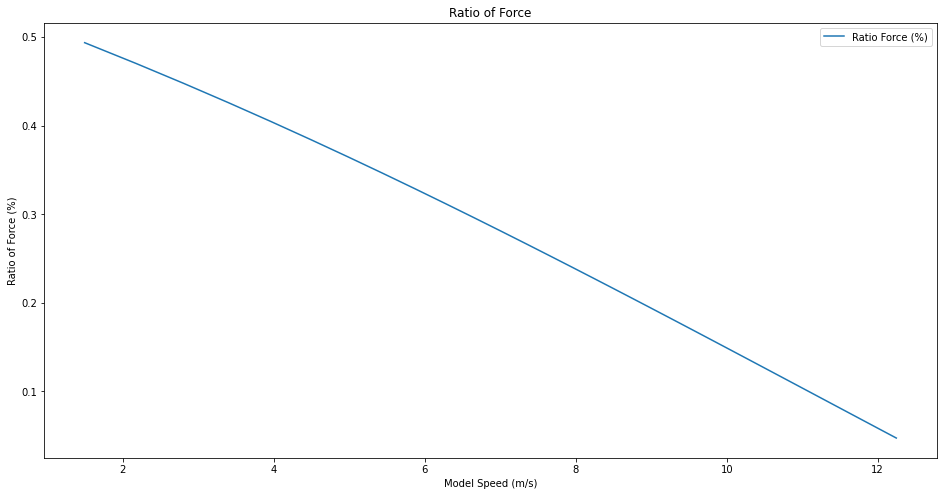

In [10]:
ratio_of_force_df = df[["Model Speed (m/s)", "Ratio Force (%)"]]
ratio_of_force_df = ratio_of_force_df[df["Ratio Force (%)"] < 0.5] # Filter Rows that have Ratio of Force below 0.5 (50%)
plot = ratio_of_force_df.plot.line(x="Model Speed (m/s)", figsize=(16,8), title="Ratio of Force")
plot.set_ylabel("Ratio of Force (%)")

#### Plot Rate of Decrease in Ratio of Force (DRF)

Text(0, 0.5, 'Ratio of Force (%)')

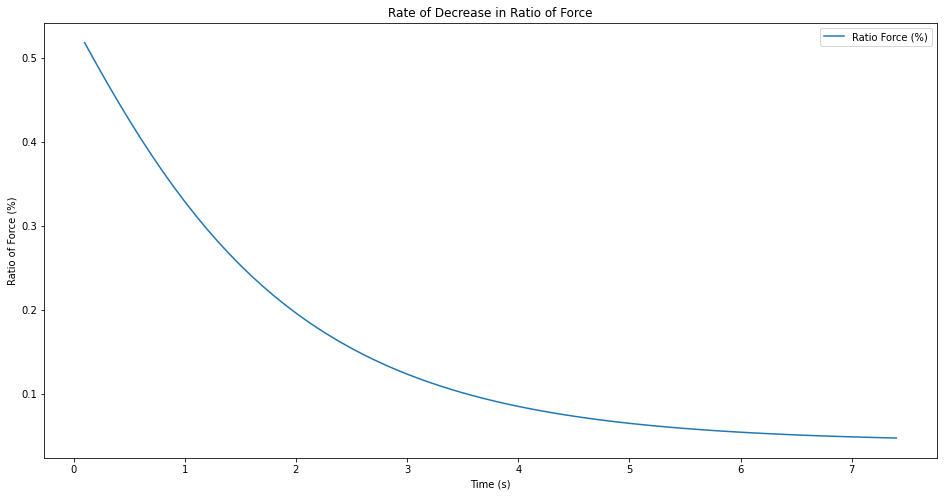

In [11]:
decrease_ratio_of_force_df = df[["Time (s)", "Ratio Force (%)"]]
plot = decrease_ratio_of_force_df.plot.line(x="Time (s)", figsize=(16,8), title="Rate of Decrease in Ratio of Force")
plot.set_ylabel("Ratio of Force (%)")

#### Calculate FV KPIs

In [12]:
f0_n = helpers.calc_f0_n(df["Model Speed (m/s)"], df["Force (N)"])
fv_profile_slope = helpers.calc_fv_profile_slope(df["Model Speed (m/s)"], df["Force (N/kg)"])
v0_ms = ((f0_n * -1) / bodyweight) / fv_profile_slope
pmax = f0_n * v0_ms / 4
rf_max = ratio_of_force_df["Ratio Force (%)"].iloc[0] * 100
drf = helpers.calc_fv_profile_slope(ratio_of_force_df["Model Speed (m/s)"], ratio_of_force_df["Ratio Force (%)"])

fv_kpi_set = {
    "F0 (N)": f0_n,
    "F0 (N/kg)": f0_n / bodyweight,
    "V0 (m/s)": v0_ms,
    "Pmax (W)": pmax,
    "Pmax (W/kg)": pmax / bodyweight,
    "FV Profile Slope": fv_profile_slope,
    "RFmax": "{}%".format(round(rf_max, 2)),
    "Drf": "{}%".format(round((drf * 100), 2))
}

for key, value in fv_kpi_set.items():
    df[key] = value

df

,Velocity (m/s),Time (s),Model Speed (m/s),Acceleration (m/s2),Force (N),Force (N/kg),Power (W/kg),Ratio Force (%),F0 (N),F0 (N/kg),V0 (m/s),Pmax (W),Pmax (W/kg),FV Profile Slope,RFmax,Drf
0,0.50,0.1,0.771616,7.469925,702.366782,7.471987,5.765503,0.517650,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
1,1.03,0.2,1.495022,7.003212,659.029439,7.010951,10.481525,0.493685,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
2,1.63,0.3,2.173230,6.565658,618.709187,6.582013,14.304227,0.470329,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
3,2.23,0.4,2.809064,6.155442,581.180068,6.182767,17.367790,0.447663,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
4,2.83,0.5,3.405173,5.770856,546.234770,5.811008,19.787486,0.425752,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12.30,7.0,12.214999,0.087097,56.754208,0.603768,7.375028,0.048830,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
70,12.32,7.1,12.223434,0.081656,56.309779,0.599040,7.322328,0.048448,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
71,12.34,7.2,12.231341,0.076554,55.893160,0.594608,7.272854,0.048091,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%
72,12.35,7.3,12.238755,0.071771,55.502607,0.590453,7.226413,0.047755,734.140264,7.810003,13.194359,2421.62764,25.761996,-0.59192,49.37%,-4.29%


#### Write Data to CSV

In [13]:
# Write new csv to fvps folder
df.to_csv(r"fvps/Usain Bolt FVP Stats 120805.csv", index=False)